In [3]:
# !pip uninstall yfinance

In [1]:
!pip install yfinance --upgrade --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.9/117.9 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 56.6 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.57
    Uninstalling yfinance-0.2.57:
      Successfully uninstalled yfinance-0.2.57


In [3]:
# !pip install --upgrade yfinance==0.2.54

In [2]:
!pip install curl_cffi

In [3]:
!pip install --upgrade yahooquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 29.9 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 5.4.0
    Uninstalling lxml-5.4.0:
      Successfully uninstalled lxml-5.4.0


In [ ]:
# !pip show yfinance

In [4]:
import yfinance as yf
from yahooquery import Ticker
import pandas as pd
import numpy as np
import datetime as dt
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

#Get the components of S&P 500 stocks through API

In [5]:
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

In [6]:
tables = pd.read_html(url, flavor='bs4')

print(f"totally find  {len(tables)} tables")
print(tables[0].head())

totally find  2 tables
  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [7]:
constituent_stocks = tables[0]

In [8]:
SP500_df = constituent_stocks
SP500_df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [ ]:
# SP500_df.Symbol.values.tolist()

#The information of the components of S&P 500 stocks

In [9]:
SP500_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             503 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [ ]:
# df_rename = df.rename(columns = {'Date added':'Date_Added','Index weighting' : 'Weights'})

In [10]:
symbols = SP500_df.Symbol.values.tolist()
symbols = [s.replace('.', '-') for s in symbols]
symbols

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'APO',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'CEG',
 'COO',


#Downloading the daily stock prices of SP500 tickers

In [11]:
from curl_cffi import requests
session = requests.Session(impersonate="chrome")

df_ticker = pd.DataFrame()

for symbol in symbols:
    data = yf.download(symbol, session=session, start='2020-01-02', end='2025-03-31', progress=False, auto_adjust=True)

    # solve MultiIndex
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)

    if not data.empty:
        data["Symbol"] = symbol
        df_ticker = pd.concat([df_ticker, data])

df_ticker.reset_index(inplace=True)
df_ticker.dropna(inplace=True)

df_ticker.to_csv("SP500_stocks.csv", index=False)
print("Data saved to SP500_stocks.csv")
print(df_ticker.head())

Data saved to SP500_stocks.csv
Price       Date       Close        High         Low        Open   Volume  \
0     2020-01-02  122.357437  122.364235  120.413308  120.780382  4307633   
1     2020-01-03  121.303787  121.446536  119.386850  120.331729  2950412   
2     2020-01-06  121.419357  121.480540  119.876293  120.420106  2389608   
3     2020-01-07  120.929901  121.344562  120.195753  121.188205  2598908   
4     2020-01-08  122.785675  123.377075  120.759980  120.997903  3298927   

Price Symbol  
0        MMM  
1        MMM  
2        MMM  
3        MMM  
4        MMM  


In [12]:
df_ticker

Price,Date,Close,High,Low,Open,Volume,Symbol
0,2020-01-02,122.357437,122.364235,120.413308,120.780382,4307633,MMM
1,2020-01-03,121.303787,121.446536,119.386850,120.331729,2950412,MMM
2,2020-01-06,121.419357,121.480540,119.876293,120.420106,2389608,MMM
3,2020-01-07,120.929901,121.344562,120.195753,121.188205,2598908,MMM
4,2020-01-08,122.785675,123.377075,120.759980,120.997903,3298927,MMM
...,...,...,...,...,...,...,...
655084,2025-03-24,162.621231,164.923460,161.156174,161.724264,1817400,ZTS
655085,2025-03-25,160.757523,163.797268,159.711051,162.760757,1583800,ZTS
655086,2025-03-26,162.272415,162.920223,160.139598,160.617994,2078200,ZTS
655087,2025-03-27,164.465027,164.853715,161.116326,162.700975,1590500,ZTS


In [13]:

stocks = df_ticker[['Date', 'Symbol', 'Close']]


stocks_pivoted = stocks.pivot(index='Date', columns='Symbol', values='Close')


print(stocks_pivoted.head())

Symbol              A       AAPL       ABBV  ABNB        ABT       ACGL  \
Date                                                                      
2020-01-02  82.885246  72.716064  70.934250   NaN  78.908424  41.268997   
2020-01-03  81.554466  72.009109  70.260948   NaN  77.946457  41.221451   
2020-01-06  81.795547  72.582909  70.815414   NaN  78.354836  41.383106   
2020-01-07  82.046265  72.241547  70.411430   NaN  77.919228  41.040779   
2020-01-08  82.856316  73.403648  70.910469   NaN  78.236855  40.631893   

Symbol             ACN        ADBE         ADI        ADM  ...         WTW  \
Date                                                       ...               
2020-01-02  193.477905  334.429993  109.436203  39.867687  ...  190.150543   
2020-01-03  193.155624  331.809998  107.509750  39.789879  ...  190.197083   
2020-01-06  191.894302  333.709991  106.246635  39.478619  ...  190.429733   
2020-01-07  187.751312  333.390015  108.663818  39.003071  ...  190.038803   
2020-0

In [14]:
stocks_pivoted

Symbol,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,82.885246,72.716064,70.934250,NaN,78.908424,41.268997,193.477905,334.429993,109.436203,39.867687,...,190.150543,24.212019,139.377319,53.112015,55.137985,75.007896,92.652496,139.014847,259.140015,128.386200
2020-01-03,81.554466,72.009109,70.260948,NaN,77.946457,41.221451,193.155624,331.809998,107.509750,39.789879,...,190.197083,24.253212,137.309937,53.367439,54.694702,75.449394,92.362320,138.651428,256.049988,128.405350
2020-01-06,81.795547,72.582909,70.815414,NaN,78.354836,41.383106,191.894302,333.709991,106.246635,39.478619,...,190.429733,24.203783,137.038162,53.290813,55.114639,74.960945,92.307892,137.850159,258.010010,127.419548
2020-01-07,82.046265,72.241547,70.411430,NaN,77.919228,41.040779,187.751312,333.390015,108.663818,39.003071,...,190.038803,24.047258,137.688446,53.180126,54.663574,74.679131,92.471138,137.729034,256.470001,127.850243
2020-01-08,82.856316,73.403648,70.910469,NaN,78.236855,40.631893,188.119568,337.869995,109.645241,38.570759,...,190.252930,24.137877,138.552277,53.129047,53.839241,74.932747,92.634361,139.378204,247.639999,127.572655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,121.711426,220.729996,207.254654,129.820007,126.623451,94.010002,305.664276,394.470001,212.339996,45.930000,...,336.299835,29.559999,84.870003,68.860001,115.800003,120.800003,155.820007,111.002174,297.410004,162.621231
2025-03-25,120.254517,223.750000,199.496353,129.880005,125.020874,94.580002,307.375793,403.640015,213.580002,46.049999,...,337.007874,29.200001,86.029999,67.930000,116.589996,123.089996,155.800003,110.144012,291.019989,160.757523
2025-03-26,119.645813,221.529999,199.456726,128.639999,126.026222,95.930000,309.624634,397.809998,210.529999,47.070000,...,337.666077,29.420000,85.830002,68.919998,118.269997,123.129997,158.679993,110.403465,288.019989,162.272415


In [15]:
# daily return for all SP500 stocks
return_daily = stocks_pivoted.pct_change(periods=1).dropna()
return_daily

Symbol,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-09,-0.005156,0.003775,0.009188,0.003224,-0.004700,-0.002646,-0.004708,-0.016302,-0.005700,-0.003944,...,-0.009240,-0.000725,-0.005748,0.006909,-0.011054,-0.003506,-0.010005,-0.005922,0.002417,-0.006783
2024-07-10,0.013156,0.018804,0.000536,-0.004001,0.013873,-0.005102,-0.008790,-0.002597,0.027240,0.017424,...,0.003186,0.000363,-0.010028,0.002287,0.008834,0.020585,0.019817,0.010779,0.027186,-0.004304
2024-07-11,0.029511,-0.023221,0.010527,-0.038462,0.010965,-0.005128,0.013055,-0.012258,-0.019259,0.000311,...,0.014797,0.050036,0.008342,0.028332,0.011884,0.011222,0.002710,0.012067,0.013928,0.024497
2024-07-12,0.010778,0.013051,0.002178,0.005342,0.000384,-0.005155,0.042418,0.002546,0.020621,0.000467,...,0.008512,0.011050,0.014419,0.003698,0.000177,0.003989,0.013820,0.004622,-0.009533,0.007314
2024-07-15,-0.009226,0.016743,-0.004149,0.002998,-0.006849,0.006839,0.023307,0.011913,-0.003521,-0.013690,...,-0.003331,-0.008197,-0.014331,-0.019344,0.017127,-0.008091,-0.026045,-0.019873,0.007104,-0.005920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,0.010104,0.011270,-0.004000,0.007919,0.006886,0.022070,0.006092,0.018618,0.038845,-0.003688,...,0.013555,0.013023,0.027109,-0.003617,0.002597,0.019667,-0.005933,0.004606,0.025587,0.000859
2025-03-25,-0.011970,0.013682,-0.037434,0.000462,-0.012656,0.006063,0.005599,0.023246,0.005840,0.002613,...,0.002105,-0.012179,0.013668,-0.013506,0.006822,0.018957,-0.000128,-0.007731,-0.021486,-0.011460
2025-03-26,-0.005062,-0.009922,-0.000199,-0.009547,0.008041,0.014274,0.007316,-0.014444,-0.014280,0.022150,...,0.001953,0.007534,-0.002325,0.014574,0.014409,0.000325,0.018485,0.002356,-0.010309,0.009423


In [16]:
# Add the first level columns index "Performance"
multi_index = pd.MultiIndex.from_tuples([('Performance', col) for col in stocks_pivoted.columns])
stocks_pivoted.columns = multi_index
stocks_pivoted

Performance                                                  \
                     A        AAPL        ABBV        ABNB         ABT   
Date                                                                     
2020-01-02   82.885246   72.716064   70.934250         NaN   78.908424   
2020-01-03   81.554466   72.009109   70.260948         NaN   77.946457   
2020-01-06   81.795547   72.582909   70.815414         NaN   78.354836   
2020-01-07   82.046265   72.241547   70.411430         NaN   77.919228   
2020-01-08   82.856316   73.403648   70.910469         NaN   78.236855   
...                ...         ...         ...         ...         ...   
2025-03-24  121.711426  220.729996  207.254654  129.820007  126.623451   
2025-03-25  120.254517  223.750000  199.496353  129.880005  125.020874   
2025-03-26  119.645813  221.529999  199.456726  128.639999  126.026222   
2025-03-27  118.717781  223.850006  200.863724  125.650002  130.744370   
2025-03-28  116.442619  217.899994  203.410172  120.690002  130.216812   

                                                                      ...  \
                 ACGL         ACN        ADBE         ADI        ADM  ...   
Date                                                                  ...   
2020-01-02  41.268997  193.477905  334.429993  109.436203  39.867687  ...   
2020-01-03  41.221451  193.155624  331.809998  107.509750  39.789879  ...   
2020-01-06  41.383106  191.894302  333.709991  106.246635  39.478619  ...   
2020-01-07  41.040779  187.751312  333.390015  108.663818  39.003071  ...   
2020-01-08  40.631893  188.119568  337.869995  109.645241  38.570759  ...   
...               ...         ...         ...         ...        ...  ...   
2025-03-24  94.010002  305.664276  394.470001  212.339996  45.930000  ...   
2025-03-25  94.580002  307.375793  403.640015  213.580002  46.049999  ...   
2025-03-26  95.930000  309.624634  397.809998  210.529999  47.070000  ...   
2025-03-27  96.940002  307.007629  396.149994  208.940002  48.279999  ...   
2025-03-28  95.059998  302.828339  385.709991  201.559998  47.869999  ...   

                                                                      \
                   WTW         WY        WYNN        XEL         XOM   
Date                                                                   
2020-01-02  190.150543  24.212019  139.377319  53.112015   55.137985   
2020-01-03  190.197083  24.253212  137.309937  53.367439   54.694702   
2020-01-06  190.429733  24.203783  137.038162  53.290813   55.114639   
2020-01-07  190.038803  24.047258  137.688446  53.180126   54.663574   
2020-01-08  190.252930  24.137877  138.552277  53.129047   53.839241   
...                ...        ...         ...        ...         ...   
2025-03-24  336.299835  29.559999   84.870003  68.860001  115.800003   
2025-03-25  337.007874  29.200001   86.029999  67.930000  116.589996   
2025-03-26  337.666077  29.420000   85.830002  68.919998  118.269997   
2025-03-27  339.949860  29.590000   86.150002  69.320000  117.889999   
2025-03-28  336.239990  29.360001   82.330002  69.720001  117.730003   

                                                                        
                   XYL         YUM         ZBH        ZBRA         ZTS  
Date                                                                    
2020-01-02   75.007896   92.652496  139.014847  259.140015  128.386200  
2020-01-03   75.449394   92.362320  138.651428  256.049988  128.405350  
2020-01-06   74.960945   92.307892  137.850159  258.010010  127.419548  
2020-01-07   74.679131   92.471138  137.729034  256.470001  127.850243  
2020-01-08   74.932747   92.634361  139.378204  247.639999  127.572655  
...                ...         ...         ...         ...         ...  
2025-03-24  120.800003  155.820007  111.002174  297.410004  162.621231  
2025-03-25  123.089996  155.800003  110.144012  291.019989  160.757523  
2025-03-26  123.129997  158.679993  110.403465  288.019989  162.272415  
2025-03-27

In [19]:
formation_start = pd.Timestamp('2020-01-02')
formation_end = pd.Timestamp('2024-12-31')

formation_return = return_daily.loc[formation_start:formation_end]

#I.   Arithmetic average annual return

In [20]:
 # The top 10 highest return stocks （ Arithmetic average annual return ）
 ann_mean_Return = formation_return.mean() * 252
 momentum_score = ann_mean_Return
 top_momentum_stocks = momentum_score.sort_values(ascending=False).head(10)
 top_momentum_stocks

Performance  PLTR    2.250973
             UAL     1.599514
             AXON    1.531924
             GEV     1.415121
             TSLA    1.205718
             VST     1.032199
             FTNT    1.020539
             TPR     1.011070
             WBD     0.963643
             DASH    0.932698
dtype: float64

In [21]:
top_average_annual_return = top_momentum_stocks.mean()
top_average_annual_return

np.float64(1.2963399422943005)

In [22]:
# The bottom 10  return stocks  （ Arithmetic average annual return ）
bottom_momentum_stocks = momentum_score.sort_values(ascending=True).head(10)
bottom_momentum_stocks


Performance  MRNA   -1.912637
             SMCI   -1.437520
             DG     -0.909338
             MCHP   -0.871943
             INTC   -0.862143
             BIIB   -0.788577
             REGN   -0.763607
             MU     -0.728223
             LRCX   -0.723444
             AMAT   -0.718796
dtype: float64

In [23]:
bottom_average_annual_return = bottom_momentum_stocks.mean()
bottom_average_annual_return

np.float64(-0.9716227568869483)

In [24]:
# We long the top 10 return stocks, then short the lowest 10 return stocks
long_returns = top_average_annual_return
short_returns = bottom_average_annual_return
strategy_returns_simple_return = round(long_returns - short_returns, 4)
print(f"The annual return of Momentum Strategy is: {strategy_returns_simple_return:.2%}")


The annual return of Momentum Strategy is: 226.80%


# Visualization

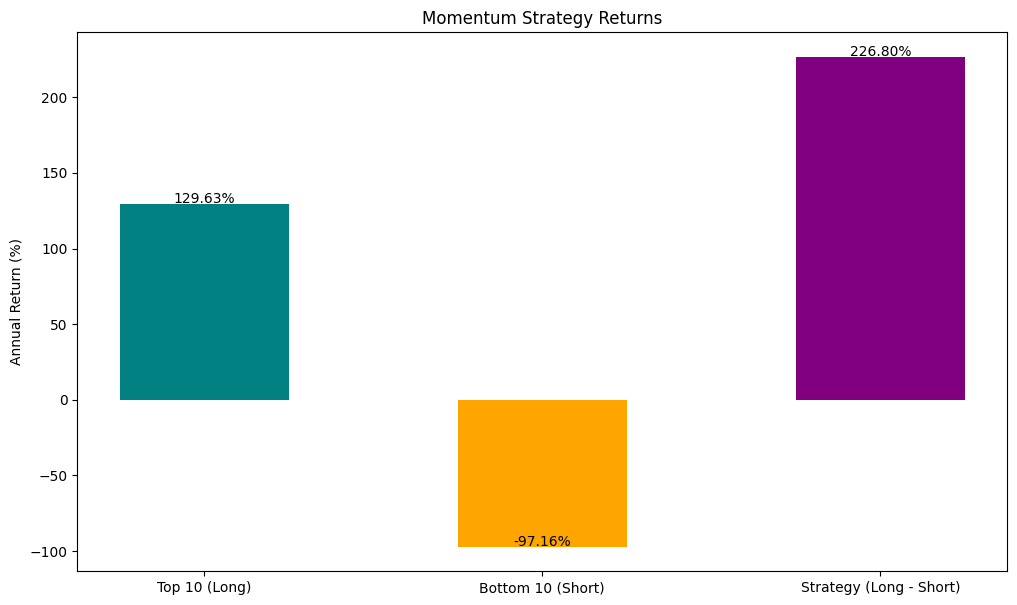

In [25]:
labels = ['Top 10 (Long)', 'Bottom 10 (Short)', 'Strategy (Long - Short)']
values = [top_average_annual_return * 100, bottom_average_annual_return * 100, strategy_returns_simple_return * 100]

plt.figure(figsize=(12, 7))
plt.bar(labels, values, color=['teal', 'orange', 'purple'],width=0.5)
plt.ylabel('Annual Return (%)')
plt.title('Momentum Strategy Returns')

for i, v in enumerate(values):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center')

plt.show()

# The return of Buy and Hold Strategy

In [26]:
# Buy and Hold
portfolio_daily_returns = formation_return.mean(axis=1)

annualized_return_simple = portfolio_daily_returns.mean() * 252
annualized_return_simple
annualized_return_simple = round(annualized_return_simple, 4)

print(f"📆 The annual return of Buy and Hold: {annualized_return_simple:.2%}")

📆 The annual return of Buy and Hold: 17.88%


# Compared  Momentum & Buy and Hold Strategy ( Arithmetic average annual return )

In [27]:
The_spread_return = strategy_returns_simple_return - annualized_return_simple
print(f"📆 The annual spread return: {The_spread_return:.2%}")

📆 The annual spread return: 208.92%


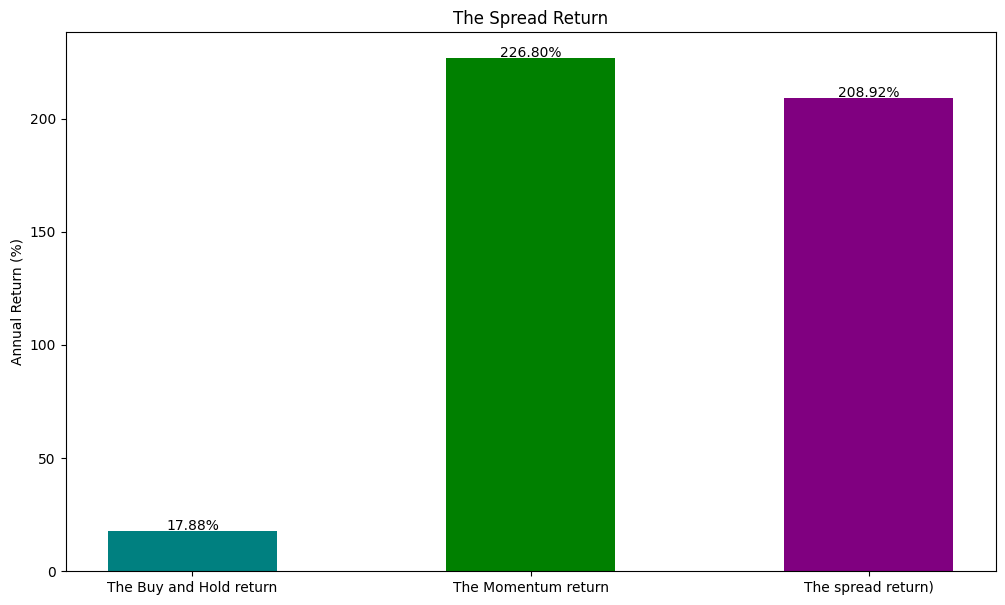

In [28]:
labels = ['The Buy and Hold return', 'The Momentum return', 'The spread return)']
values = [annualized_return_simple * 100, strategy_returns_simple_return * 100, The_spread_return * 100]

plt.figure(figsize=(12, 7))
plt.bar(labels, values, color=['teal', 'green', 'purple'],width=0.5)
plt.ylabel('Annual Return (%)')
plt.title('The Spread Return')

for i, v in enumerate(values):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center')

plt.show()

# II.  Annualized average return considering compound return

In [29]:
# The top 10 highest return stocks （ compound interest ）
total_return = (1 + formation_return).prod() - 1
annualized_return = (1 + total_return) ** (252 / len(formation_return)) - 1
top10 = annualized_return.sort_values(ascending=False).head(10).mean()

# The bottom 10  return stocks （ compound interest ）
bottom10 = annualized_return.sort_values().head(10).mean()

# We long the top 10 return stocks, then short the bottom 10 return stocks
strategy_com_returns = round(top10 - bottom10, 4)

print(f"The annual return of Momentum Strategy is: {strategy_com_returns:.2%}")

The annual return of Momentum Strategy is: 311.82%


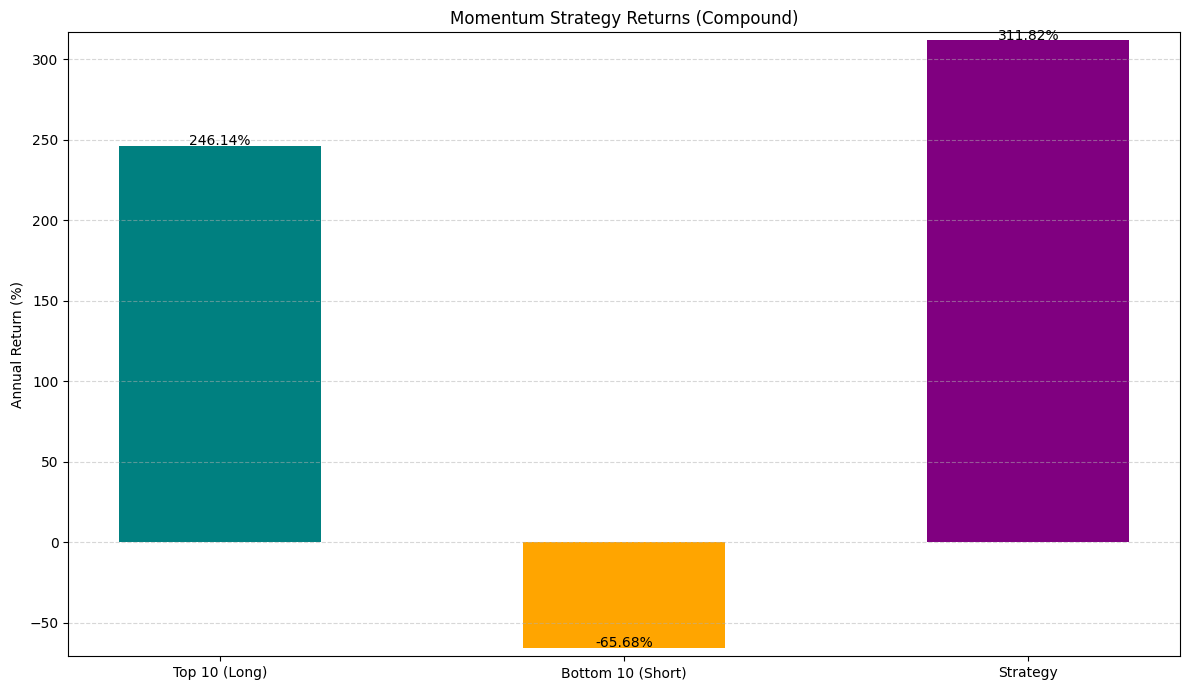

In [30]:
labels = ['Top 10 (Long)', 'Bottom 10 (Short)', 'Strategy']
values = [top10 * 100, bottom10 * 100, strategy_com_returns * 100]

plt.figure(figsize=(12, 7))
plt.bar(labels, values, color=['teal', 'orange', 'purple'], width=0.5)
plt.ylabel('Annual Return (%)')
plt.title('Momentum Strategy Returns (Compound)')
for i, v in enumerate(values):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center')
plt.ylim(min(values) - 5, max(values) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Compared  Momentum & Buy and Hold Strategy ( Compound return )

In [31]:
# Buy and Hold ( Compound return )
buy_hold_daily_returns = formation_return.mean(axis=1)

buy_hold_cumulative_return = (1 + buy_hold_daily_returns).prod() - 1

n_days = formation_return.shape[0]
buy_hold_annualized_return = (1 + buy_hold_cumulative_return) ** (252 / n_days) - 1

buy_hold_average_annualized_return = round(buy_hold_annualized_return.mean(), 4)

print(f"📈 The annual return of Buy and Hold: {buy_hold_average_annualized_return:.2%}")

📈 The annual return of Buy and Hold: 18.61%


In [32]:
# buy_hold_annualized_return.mean()
The_Spread_return = strategy_com_returns - buy_hold_average_annualized_return
print(f"📆 The annual spread return: {The_Spread_return:.2%}")

📆 The annual spread return: 293.21%


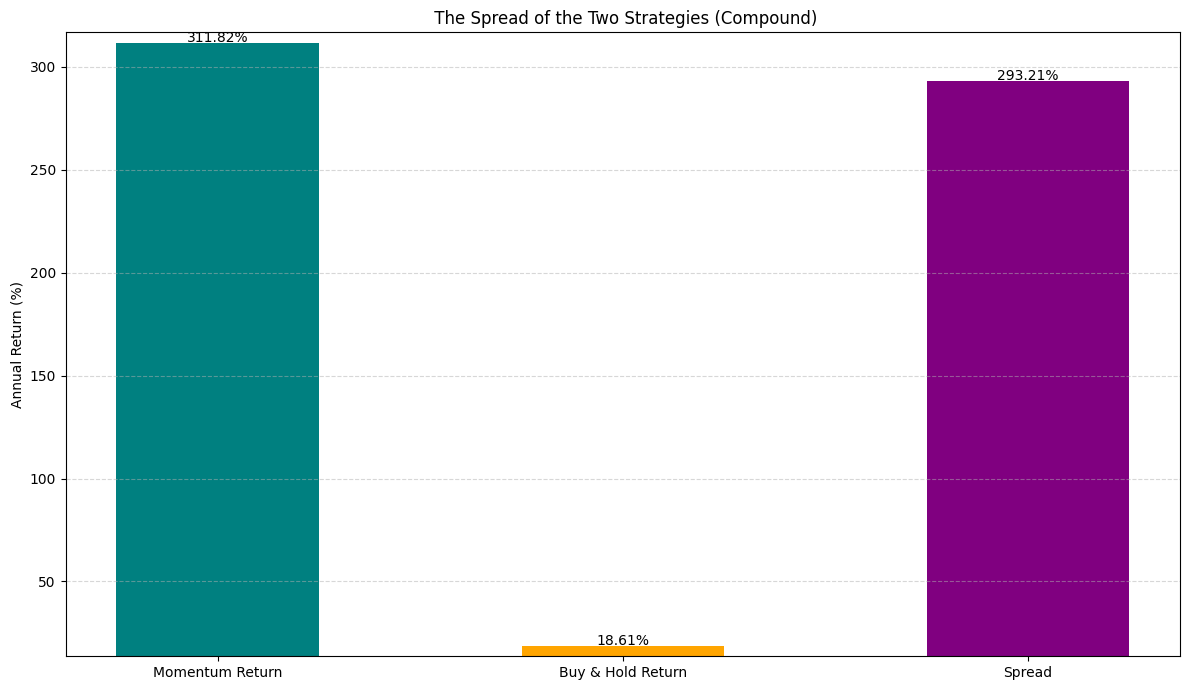

In [33]:
labels = ['Momentum Return', 'Buy & Hold Return', 'Spread']
values = [strategy_com_returns * 100, buy_hold_average_annualized_return * 100, The_Spread_return * 100]

plt.figure(figsize=(12, 7))
plt.bar(labels, values, color=['teal', 'orange', 'purple'], width=0.5)
plt.ylabel('Annual Return (%)')
plt.title(' The Spread of the Two Strategies (Compound)')
for i, v in enumerate(values):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center')
plt.ylim(min(values) - 5, max(values) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#III. The Sharpe Ratio

In [34]:
top10_daily_returns = formation_return.mean().sort_values(ascending=False).head(10)
bottom10_daily_returns = formation_return.mean().sort_values(ascending=True).head(10)

In [35]:
long_returns_sharp = formation_return[top10_daily_returns.index].mean(axis=1)
short_returns_sharp = formation_return[bottom10_daily_returns.index].mean(axis=1)
strategy_daily_returns = long_returns_sharp - short_returns_sharp


risk_free_daily_return = 0.02 / 252
excess_return = strategy_daily_returns - risk_free_daily_return

sharpe_ratio_annual = excess_return.mean() / excess_return.std() * np.sqrt(252)

print("Sharpe Ratio (Annualized):", round(sharpe_ratio_annual, 2))

Sharpe Ratio (Annualized): 6.62


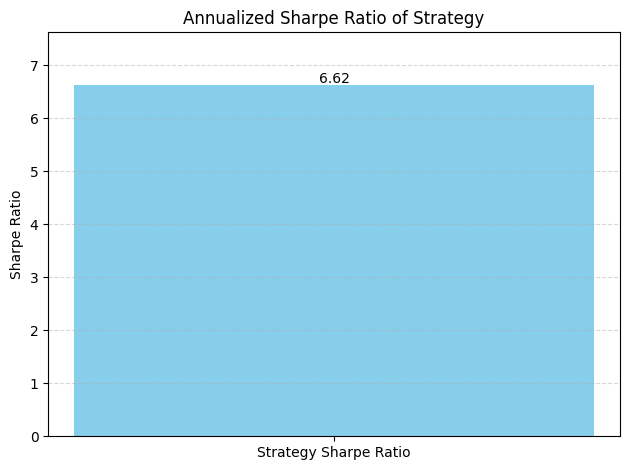

In [36]:
plt.bar(['Strategy Sharpe Ratio'], [sharpe_ratio_annual], color='skyblue',width=0.8)
plt.title('Annualized Sharpe Ratio of Strategy')
plt.ylabel('Sharpe Ratio')
plt.ylim(0, sharpe_ratio_annual + 1)
plt.text(0, sharpe_ratio_annual + 0.05, f'{sharpe_ratio_annual:.2f}', ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# IV.   Evaluating Out-of-Sample Performance

In [37]:
long_tickers = top_momentum_stocks.index.get_level_values(1).tolist()
print(long_tickers)

['PLTR', 'UAL', 'AXON', 'GEV', 'TSLA', 'VST', 'FTNT', 'TPR', 'WBD', 'DASH']


In [38]:
short_tickers = bottom_momentum_stocks.index.get_level_values(1).tolist()
print(short_tickers)

['MRNA', 'SMCI', 'DG', 'MCHP', 'INTC', 'BIIB', 'REGN', 'MU', 'LRCX', 'AMAT']


In [39]:
formation_period = pd.Timestamp('2024-12-31')
future_start = formation_period + relativedelta(days=1)
future_end = formation_period + relativedelta(months=3)
future_returns = return_daily.loc[future_start:future_end]

In [40]:
long_daily_returns = future_returns["Performance"][long_tickers]
short_daily_returns = future_returns["Performance"][short_tickers]

In [41]:
N = len(long_daily_returns)
total_long_return = (1 + long_daily_returns).prod() - 1
annualized_long_return = (1 + total_long_return) ** (252 / N) - 1

total_short_return = (1 + short_daily_returns).prod() - 1
annualized__short_return = (1 + total_short_return) ** (252 / N) - 1

In [42]:
strategy_com_returns_back_test = round((annualized_long_return.mean() - annualized__short_return.mean()) * 100, 2)
print(f"The annualized  return of the strategy is: {strategy_com_returns_back_test}%")

The annualized  return of the strategy is: -12.46%


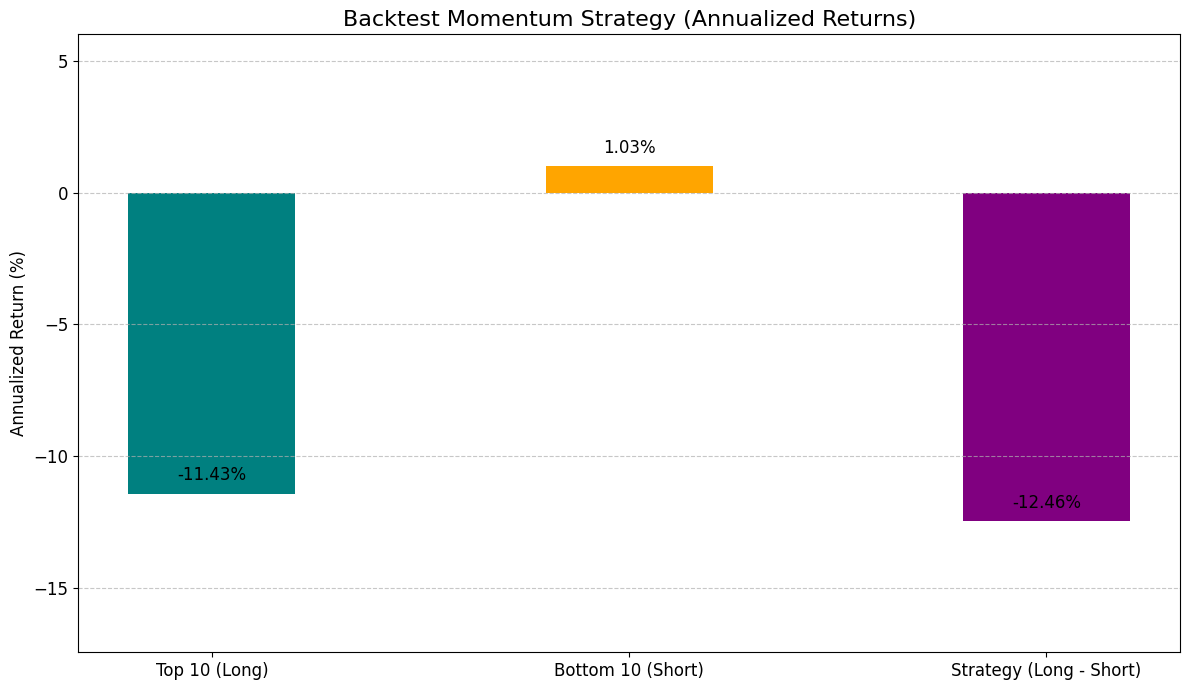

In [43]:
long_mean = annualized_long_return.mean().item()
short_mean = annualized__short_return.mean().item()
strategy_return = strategy_com_returns_back_test

labels = ['Top 10 (Long)', 'Bottom 10 (Short)', 'Strategy (Long - Short)']
values = [
    long_mean * 100,
    short_mean * 100,
    strategy_return
]

plt.figure(figsize=(12, 7))
plt.bar(labels, values, color=['teal', 'orange', 'purple'], width=0.4)
plt.ylabel('Annualized Return (%)',fontsize=12)
plt.title('Backtest Momentum Strategy (Annualized Returns)', fontsize=16)

for i, v in enumerate(values):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(min(values) - 5, max(values) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()